<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/MLWeek7_regresiautomobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Membaca dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv"
data = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari dataset untuk memeriksa strukturnya
data.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


In [ ]:
# Mengecek tipe data dari setiap kolom
print(data.dtypes)

# Mengecek jumlah missing values di setiap kolom
print(data.isnull().sum())

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
symboling              int64
dtype: object
price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size     

In [ ]:
# Identifikasi kolom numerik dan kategorikal
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Menampilkan kolom-kolom numerik dan kategorikal
print("Numerical columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'engine-size',
       'num-of-cylinders', 'curb-weight', 'height', 'width', 'length',
       'wheel-base', 'num-of-doors', 'normalized-losses', 'symboling'],
      dtype='object')
Categorical columns: Index(['fuel-system', 'engine-type', 'engine-location', 'drive-wheels',
       'body-style', 'aspiration', 'fuel-type', 'make'],
      dtype='object')


In [ ]:
# Mengisi missing values pada kolom numerik dengan rata-rata
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Mengisi missing values pada kolom kategorikal dengan modus
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Memeriksa apakah masih ada missing values
print(data.isnull().sum())

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64


In [ ]:
# Memilih fitur dan target untuk model
X = data.drop('price', axis=1)  # Fitur
y = data['price']  # Target

In [ ]:
from sklearn.preprocessing import StandardScaler

# Menyandikan fitur numerik (hanya kolom numerik yang akan distandardisasi)
X_numeric = X.select_dtypes(include=[np.number])

# Melakukan standarisasi pada kolom numerik saja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Menampilkan hasil standarisasi (hanya 5 baris pertama)
print(X_scaled[:5])

[[-0.54605874 -0.64655303 -0.263484    0.17106493 -0.28834891 -1.83940375
   0.51908935  0.07444893 -0.35288699 -0.01456628 -2.0204173  -0.84478235
  -0.42652147 -1.6907718  -1.13732958  0.          1.74347043]
 [-0.54605874 -0.64655303 -0.263484    0.17106493 -0.28834891 -1.83940375
   0.51908935  0.07444893 -0.35288699 -0.01456628 -2.0204173  -0.84478235
  -0.42652147 -1.6907718  -1.13732958  0.          1.74347043]
 [-0.69162706 -0.95301169 -0.263484    1.26180693 -0.28834891  0.6859198
  -2.40486235  0.60404617  1.50203181  0.51488192 -0.54352748 -0.19056612
  -0.23151305 -0.70859588 -1.13732958  0.          0.133509  ]
 [-0.10935377 -0.18686504  0.78734611 -0.0572299  -0.03597283  0.46215695
  -0.51724796 -0.43107572 -0.35288699 -0.42079745  0.23594216  0.13654199
   0.2072559   0.17369775  0.8879152   1.32896072  0.93848971]
 [-1.27390036 -1.10624102  0.78734611  0.27252931 -0.54072499  0.46215695
  -0.51724796  0.21888454  0.57457241  0.51680718  0.23594216  0.23000146
   0.2072

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (164, 17)
Ukuran data uji: (41, 17)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Membuat dan melatih model Boosting (Gradient Boosting)
boosting_model = GradientBoostingRegressor(random_state=42)
boosting_model.fit(X_train, y_train)

# Evaluasi model dengan data uji
boosting_pred = boosting_model.predict(X_test)

# Menghitung RMSE, MSE, dan R-Squared untuk evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse_boosting = np.sqrt(mean_squared_error(y_test, boosting_pred))
mse_boosting = mean_squared_error(y_test, boosting_pred)
r2_boosting = r2_score(y_test, boosting_pred)

print(f"RMSE (Boosting): {rmse_boosting}")
print(f"MSE (Boosting): {mse_boosting}")
print(f"R-Squared (Boosting): {r2_boosting}")

RMSE (Boosting): 2537.09209817071
MSE (Boosting): 6436836.314600256
R-Squared (Boosting): 0.9174469031609604


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Membuat dan melatih model Bagging (Random Forest)
bagging_model = RandomForestRegressor(random_state=42)
bagging_model.fit(X_train, y_train)

# Evaluasi model dengan data uji
bagging_pred = bagging_model.predict(X_test)

# Menghitung RMSE, MSE, dan R-Squared untuk evaluasi
rmse_bagging = np.sqrt(mean_squared_error(y_test, bagging_pred))
mse_bagging = mean_squared_error(y_test, bagging_pred)
r2_bagging = r2_score(y_test, bagging_pred)

print(f"RMSE (Bagging): {rmse_bagging}")
print(f"MSE (Bagging): {mse_bagging}")
print(f"R-Squared (Bagging): {r2_bagging}")

RMSE (Bagging): 2193.5244996032357
MSE (Bagging): 4811549.730359625
R-Squared (Bagging): 0.9382913730561595


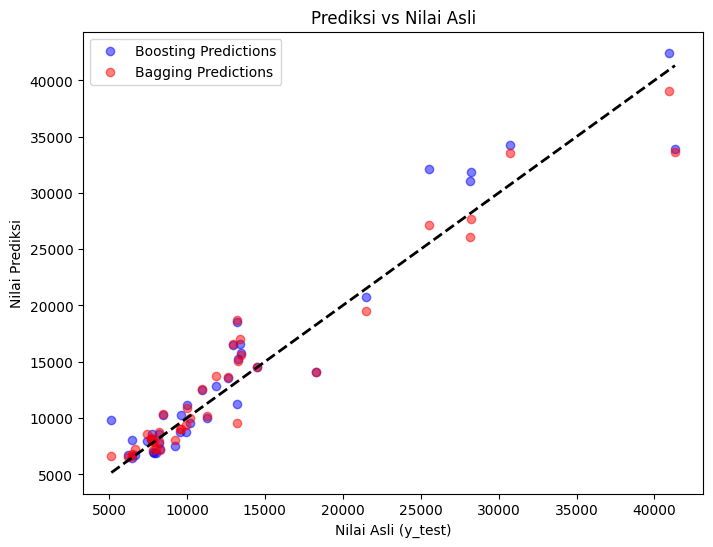

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Prediksi vs Nilai Asli (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, boosting_pred, color='blue', label='Boosting Predictions', alpha=0.5)
plt.scatter(y_test, bagging_pred, color='red', label='Bagging Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Garis identitas
plt.xlabel('Nilai Asli (y_test)')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Nilai Asli')
plt.legend()
plt.show()

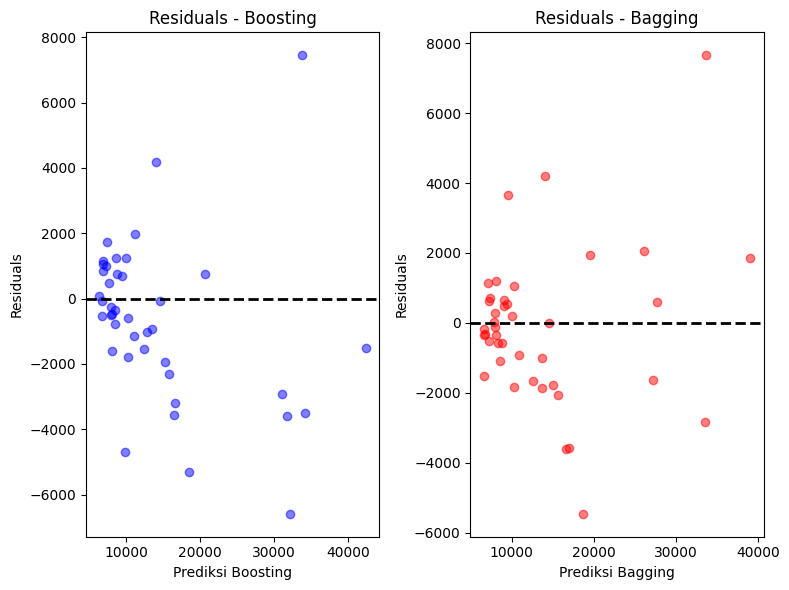

In [ ]:
# Residual untuk Boosting Model
residual_boosting = y_test - boosting_pred

# Residual untuk Bagging Model
residual_bagging = y_test - bagging_pred

# Visualisasi Residuals
plt.figure(figsize=(8, 6))

# Residual Boosting
plt.subplot(1, 2, 1)
plt.scatter(boosting_pred, residual_boosting, color='blue', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', lw=2)  # Garis nol
plt.xlabel('Prediksi Boosting')
plt.ylabel('Residuals')
plt.title('Residuals - Boosting')

# Residual Bagging
plt.subplot(1, 2, 2)
plt.scatter(bagging_pred, residual_bagging, color='red', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', lw=2)  # Garis nol
plt.xlabel('Prediksi Bagging')
plt.ylabel('Residuals')
plt.title('Residuals - Bagging')

plt.tight_layout()
plt.show()

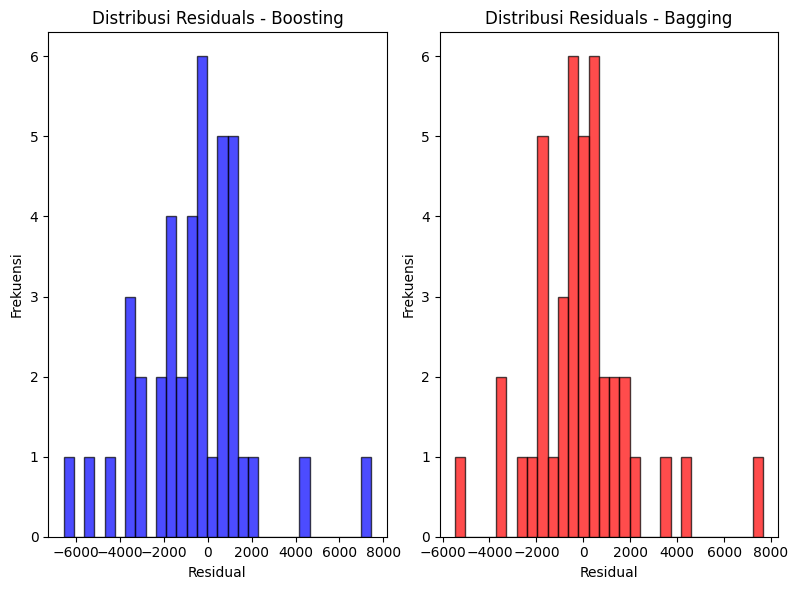

In [ ]:
# Visualisasi Distribusi Kesalahan (Residuals)
plt.figure(figsize=(8, 6))

# Distribusi residual Boosting
plt.subplot(1, 2, 1)
plt.hist(residual_boosting, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribusi Residuals - Boosting')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')

# Distribusi residual Bagging
plt.subplot(1, 2, 2)
plt.hist(residual_bagging, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribusi Residuals - Bagging')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

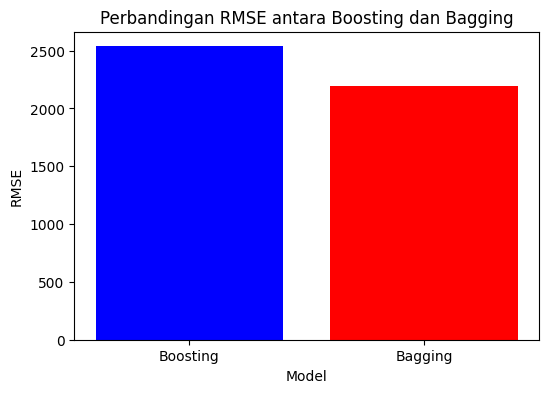

In [ ]:
# Visualisasi perbandingan RMSE antara Boosting dan Bagging
models = ['Boosting', 'Bagging']
rmse_values = [rmse_boosting, rmse_bagging]

plt.figure(figsize=(6, 4))
plt.bar(models, rmse_values, color=['blue', 'red'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Perbandingan RMSE antara Boosting dan Bagging')
plt.show()

# Penjelasan Matematis untuk Evaluasi Model dan Teknik Ensemble

---

## 1. RMSE (Root Mean Squared Error)

RMSE (Root Mean Squared Error) adalah ukuran seberapa besar kesalahan prediksi model dengan mengukur akar kuadrat dari rata-rata selisih kuadrat antara nilai prediksi dan nilai asli. RMSE memberikan gambaran tentang seberapa besar kesalahan rata-rata yang dilakukan model dalam memprediksi nilai target. Semakin kecil nilai RMSE, semakin baik performa model.

**Rumus RMSE:**

RMSE = √( (1/n) * Σ(y_i - ŷ_i)² )

Dimana:
- y_i = Nilai asli (actual)
- ŷ_i = Nilai prediksi (predicted)
- n = Jumlah data atau observasi

---

## 2. MSE (Mean Squared Error)

MSE (Mean Squared Error) adalah ukuran yang mengukur rata-rata kuadrat dari kesalahan prediksi model. MSE memberikan informasi tentang seberapa besar kesalahan rata-rata dalam bentuk kuadrat. Nilai MSE yang lebih kecil menunjukkan performa model yang lebih baik.

**Rumus MSE:**

MSE = (1/n) * Σ(y_i - ŷ_i)²

Dimana:
- y_i = Nilai asli (actual)
- ŷ_i = Nilai prediksi (predicted)
- n = Jumlah data

---

## 3. R-Squared (R²)

R-Squared (R²) adalah ukuran yang menunjukkan seberapa baik model dapat menjelaskan variasi dalam data. Nilai R² berkisar antara 0 hingga 1, dengan nilai 1 menunjukkan bahwa model dapat menjelaskan seluruh variasi dalam data. R² mengukur proporsi variansi dalam variabel dependen yang dapat dijelaskan oleh variabel independen dalam model.

**Rumus R²:**

R² = 1 - ( Σ(y_i - ŷ_i)² / Σ(y_i - ȳ)² )

Dimana:
- y_i = Nilai asli (actual)
- ŷ_i = Nilai prediksi (predicted)
- ȳ = Rata-rata nilai asli (mean of actual values)
- n = Jumlah data

R² mengukur seberapa baik model memprediksi data, dengan nilai yang lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan variabilitas.

---

## 4. Teknik Ensemble: Bagging dan Boosting

### **Bagging (Bootstrap Aggregating)**

Bagging adalah teknik ensemble yang mengurangi varians model dengan membuat beberapa model yang dilatih pada subset data yang berbeda dan kemudian menggabungkan hasil prediksinya. Biasanya, bagging menggunakan teknik pembelajaran seperti pohon keputusan.

**Proses Bagging:**
1. Mengambil sampel acak dengan pengembalian (bootstrap sampling) dari dataset pelatihan.
2. Melatih model secara independen pada setiap subset.
3. Menggabungkan hasil prediksi, biasanya dengan rata-rata (untuk regresi) atau voting mayoritas (untuk klasifikasi).

### **Boosting**

Boosting adalah teknik ensemble yang mengurangi bias model dengan membuat model bertahap yang masing-masing memperbaiki kesalahan dari model sebelumnya. Teknik ini memberi bobot lebih besar pada data yang sulit diprediksi.

**Proses Boosting:**
1. Melatih model pertama pada data.
2. Menilai kesalahan model pertama dan memberi bobot lebih besar pada data yang salah diprediksi.
3. Melatih model kedua untuk memperbaiki kesalahan model pertama.
4. Ulangi langkah ini untuk beberapa model, menggabungkan prediksi untuk hasil akhir.

---

Dengan menggunakan teknik ensemble seperti Bagging dan Boosting, model dapat menjadi lebih kuat dan lebih akurat dalam memprediksi nilai, baik dengan mengurangi varians (Bagging) maupun mengurangi bias (Boosting).